# Таратин Артём ПМ22-1

## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime
import yfinance as yf

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

[*********************100%***********************]  1 of 1 completed


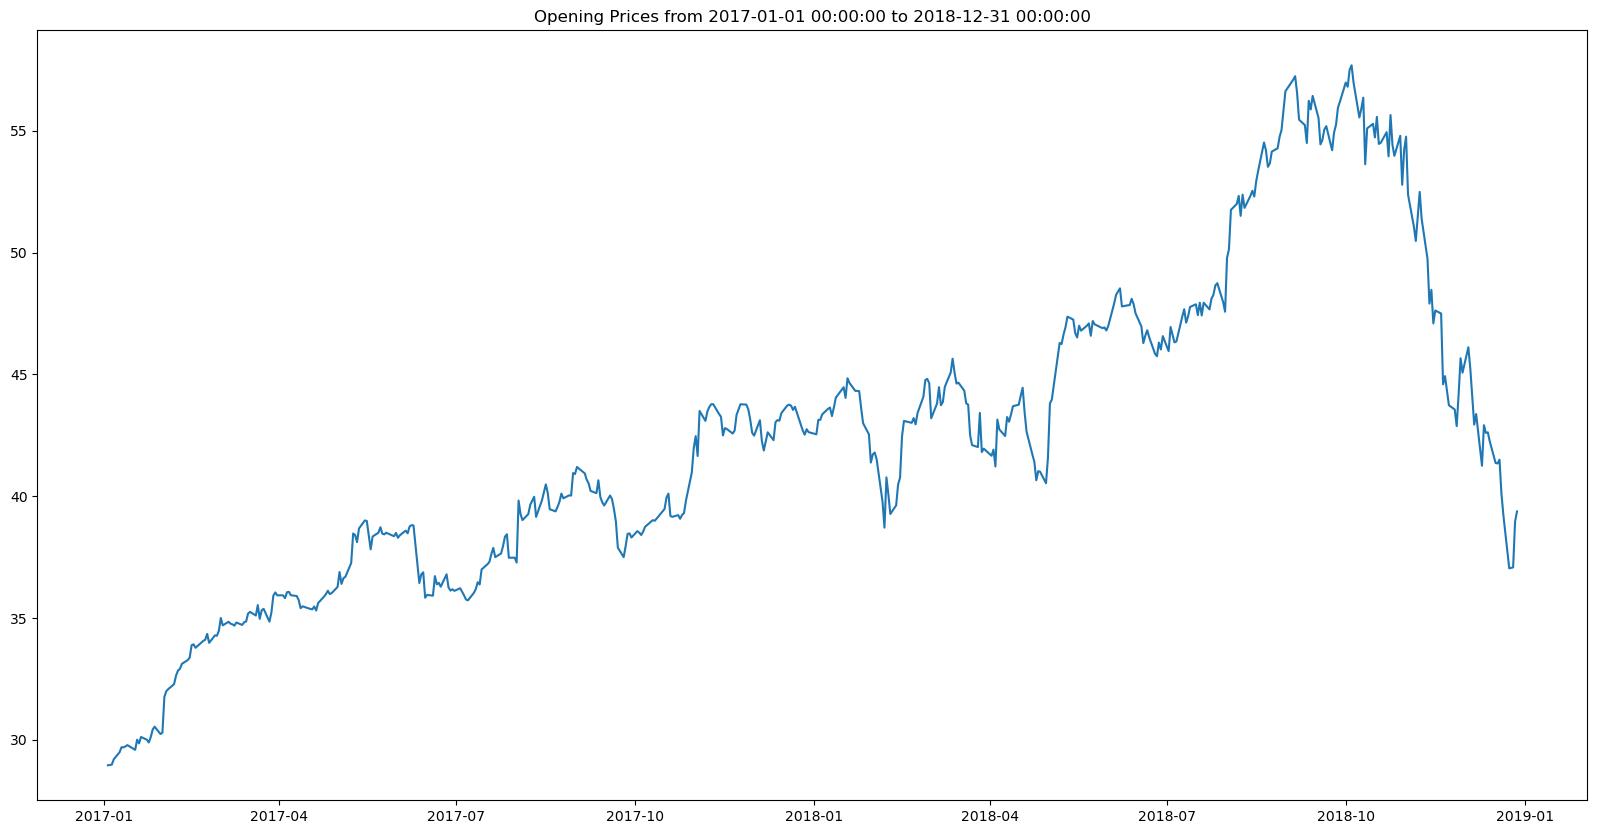

In [2]:
start_date = datetime(2017, 1, 1)
end_date = datetime(2018, 12, 31)
  
data = yf.download('AAPL', start_date, end_date)

plt.figure(figsize = (20,10))
plt.title('Opening Prices from {} to {}'.format(start_date, end_date))
plt.plot(data['Open'])
plt.show()

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

<AxesSubplot:xlabel='Open'>

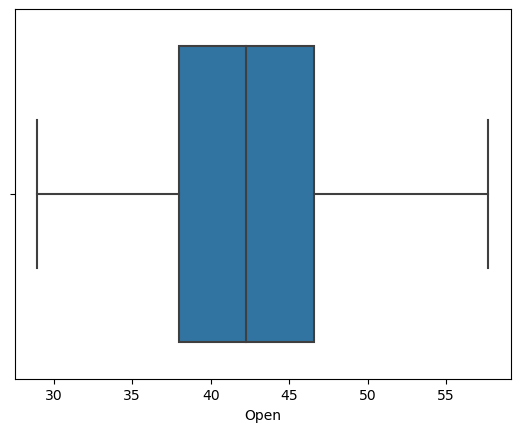

In [3]:
sns.boxplot(data=data, x='Open')

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [255]:
data = np.load('labs/average_ratings.npy')
data

array([[ 5.        ,  5.01310274,  5.02623981, ...,  5.52281922,
         5.53729203,  5.52281922],
       [ 7.        ,  6.97074954,  7.        , ..., 10.        ,
        10.        , 10.        ],
       [ 3.        ,  2.9968611 ,  2.99372548, ...,  2.99372548,
         2.99059315,  2.98746409]])

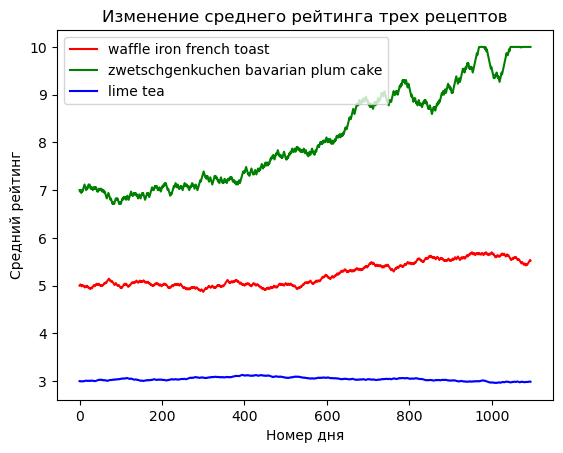

In [256]:
fig, ax = plt.subplots()
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')

y1_line, = ax.plot(range(len(data[0])), data[0], 'r', label = 'waffle iron french toast')
y2_line, = ax.plot(range(len(data[1])), data[1], 'g', label = 'zwetschgenkuchen bavarian plum cake')
y3_line, = ax.plot(range(len(data[2])), data[2], 'b', label = 'lime tea')

ax.legend(handles=[y1_line, y2_line, y3_line], loc='upper left')

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [257]:
dates = pd.date_range(start='1/1/2019', end='30/12/2021')
dates

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: UserWarning: Parsing '30/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', length=1095, freq='D')

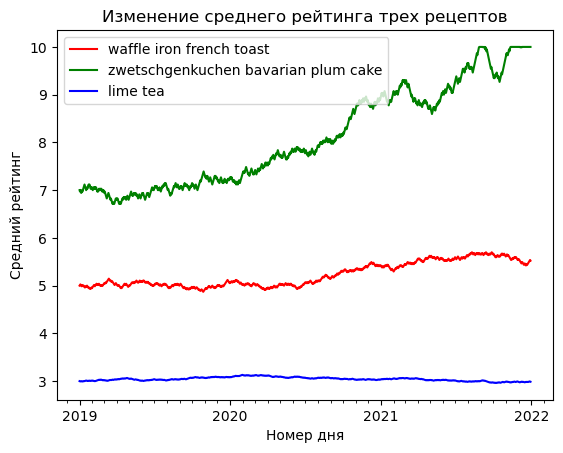

In [258]:
fig, ax = plt.subplots()
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')

y1_line, = ax.plot(dates, data[0], 'r', label = 'waffle iron french toast')
y2_line, = ax.plot(dates, data[1], 'g', label = 'zwetschgenkuchen bavarian plum cake')
y3_line, = ax.plot(dates, data[2], 'b', label = 'lime tea')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())

ax.legend(handles=[y1_line, y2_line, y3_line], loc='upper left')

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

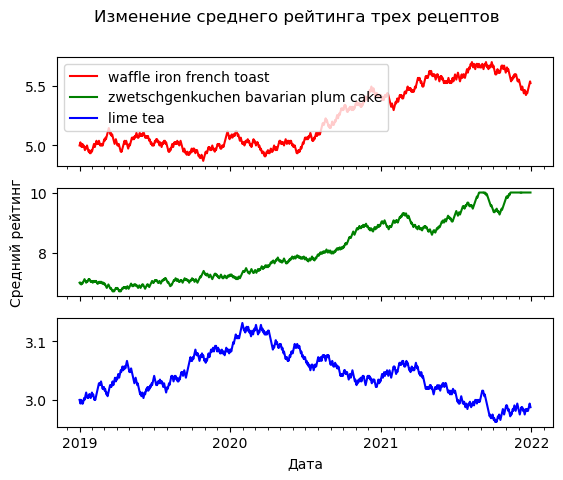

In [259]:
fig, ax = plt.subplots(nrows=3, ncols=1)

fig.suptitle('Изменение среднего рейтинга трех рецептов')
ax[1].set_ylabel('Средний рейтинг')
ax[2].set_xlabel('Дата')

y1_line, = ax[0].plot(dates, data[0], 'r', label = 'waffle iron french toast')
y2_line, = ax[1].plot(dates, data[1], 'g', label = 'zwetschgenkuchen bavarian plum cake')
y3_line, = ax[2].plot(dates, data[2], 'b', label = 'lime tea')

for i in range(3):
    ax[i].xaxis.set_minor_locator(mdates.MonthLocator())
    ax[i].xaxis.set_major_locator(mdates.YearLocator())

ax[0].tick_params(labelbottom=False)
ax[1].tick_params(labelbottom=False)

ax[0].legend(handles=[y1_line, y2_line, y3_line], loc='upper left')

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [260]:
visitors = np.load('labs/visitors.npy')
visitors

array([2311, 2023, 1839, 1523, 1371, 1217, 1098,  958,  862,  724,  654,
        558,  526,  454,  383,  372,  356,  274,  239,  236,  214,  179,
        180,  140,  138,  112,  102,  101,   74,   81,   70,   74,   53,
         57,   52,   44,   38,   30,   37,   27,   20,   21,   16,   16,
         12,    9,   13,   10,   13,    7,    5,    8,    6,    8,    9,
          4,    3,    4,    4,    2,    2,    3,    2,    2,    2,    2,
          2,    3,    2,    2,    3,    2,    2,    2,    2,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2], dtype=int32)

[]

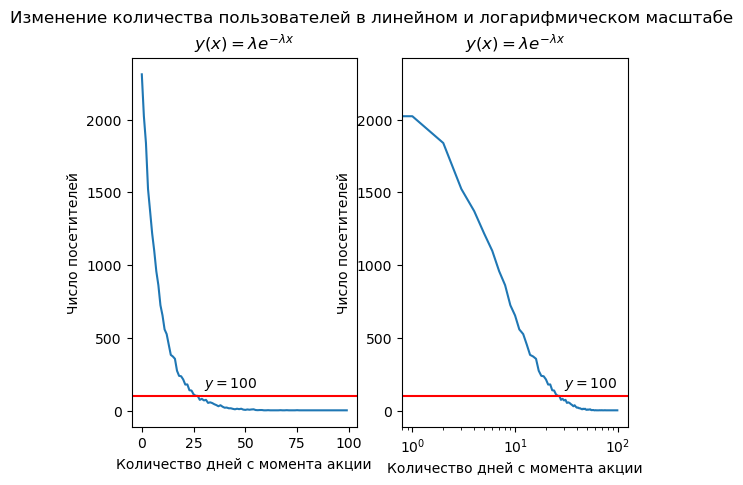

In [261]:
x = lambda x: np.log(x)
fig, ax = plt.subplots(nrows=1, ncols=2)

plt.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

for i in range(len(ax)):
    ax[i].plot(visitors, label = 'l1')
    ax[i].axhline(y=100, color='r', linestyle='-')
    ax[i].set_title('$y(x)=\lambda e^{-\lambda x}$')
    ax[i].set_xlabel('Количество дней с момента акции')
    ax[i].set_ylabel('Число посетителей')
    ax[i].text(30, 160, '$y=100$')

ax[1].semilogx()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [326]:
reviews = pd.read_csv('labs/reviews_sample.csv')
recipes = pd.read_csv('labs/recipes_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [509]:
data = [recipes[recipes.minutes<5], recipes[(5<=recipes.minutes) & (recipes.minutes<50)], recipes[50<=recipes.minutes]]

In [264]:
info = list(map(lambda x: [data[x].n_steps.mean(), len(data[x])], np.arange(3)))
info

[[4.990430622009569, 675],
 [8.581921927361652, 17607],
 [11.917290164603456, 11718]]

Text(0.5, 1.0, 'Размеры групп рецептов')

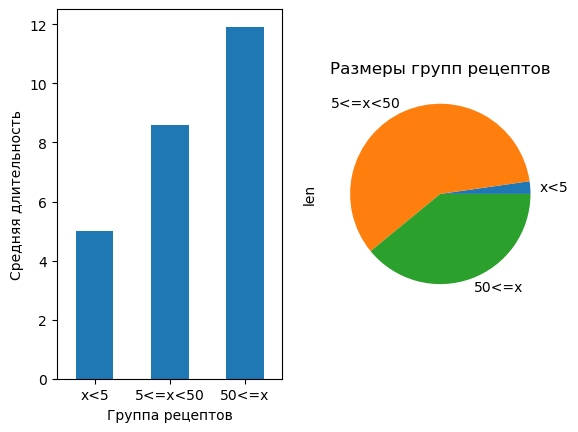

In [270]:
df_tmp = pd.DataFrame({'data': [info[0][0], info[1][0], info[2][0]], 'len': [info[0][1], info[1][1], info[2][1]]}, index=['x<5', '5<=x<50', '50<=x'])

fig, ax = plt.subplots(nrows=1, ncols=2)
df_tmp.data.plot.bar(ax=ax[0], rot=0)
df_tmp.len.plot.pie(ax=ax[1])

ax[0].set_xlabel('Группа рецептов')
ax[0].set_ylabel('Средняя длительность')
ax[1].set_title('Размеры групп рецептов')

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [339]:
y2008 = reviews[pd.DatetimeIndex(reviews['date']).year == 2008]
y2009 = reviews[pd.DatetimeIndex(reviews['date']).year == 2009]

Text(0.5, 0.98, 'Гистограммы рейтинга отзывов в 2008 и 2009 годах')

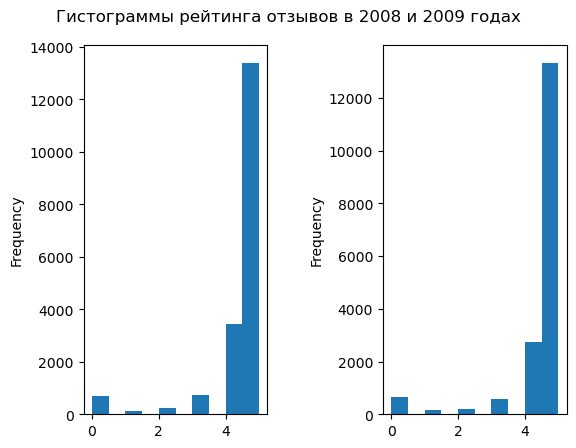

In [409]:
fig, ax = plt.subplots(nrows=1, ncols=2)

#plt.tick_params(axis='y', which='major', pad=-210)

y2008.rating.plot.hist(ax=ax[0])
y2009.rating.plot.hist(ax=ax[1])

fig.tight_layout(pad=3)

plt.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')

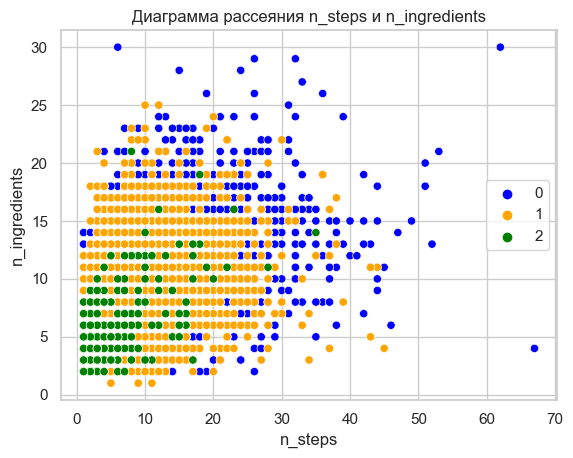

In [545]:
sns.set(style='whitegrid')
 
sns.scatterplot(data=data[2], x="n_steps", y="n_ingredients", hue=0, palette=['blue'])
sns.scatterplot(data=data[1], x="n_steps", y="n_ingredients", hue=1, palette=['orange'])
sns.scatterplot(data=data[0], x="n_steps", y="n_ingredients", hue=2, palette=['green']) \
    .set_title('Диаграмма рассеяния n_steps и n_ingredients')

In [546]:
cat = []
for i in range(len(recipes)):
    if recipes['minutes'][i] < 5:
        cat.append(0)
    elif recipes['minutes'][i] >= 50:
        cat.append(1)
    else:
        cat.append(2)

recipes['cat'] = cat

Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')

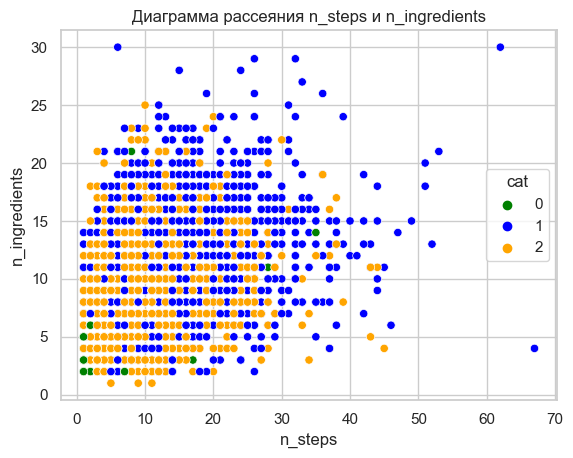

In [547]:
sns.scatterplot(data=recipes, x="n_steps", y="n_ingredients", hue='cat', palette=['green', 'blue', 'orange']) \
    .set_title('Диаграмма рассеяния n_steps и n_ingredients')

Да, чем больше игридиентов возможно тем больше получается шагов

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [426]:
mg = recipes.merge(reviews, left_on='id', right_on='recipe_id')[['minutes', 'n_steps', 'n_ingredients', 'rating']]
mg

,minutes,n_steps,n_ingredients,rating
0,90,NaN,18.0,5
1,90,NaN,18.0,5
2,90,NaN,18.0,5
3,10,NaN,NaN,5
4,10,NaN,NaN,5
...,...,...,...,...
126691,60,NaN,NaN,5
126692,60,NaN,NaN,5
126693,60,NaN,NaN,5
126694,60,NaN,NaN,5


In [431]:
corr = mg.corr()
corr

,minutes,n_steps,n_ingredients,rating
minutes,1.000000,0.030675,-0.006254,-0.025770
n_steps,0.030675,1.000000,0.293526,-0.019057
n_ingredients,-0.006254,0.293526,1.000000,0.003405
rating,-0.025770,-0.019057,0.003405,1.000000


Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')

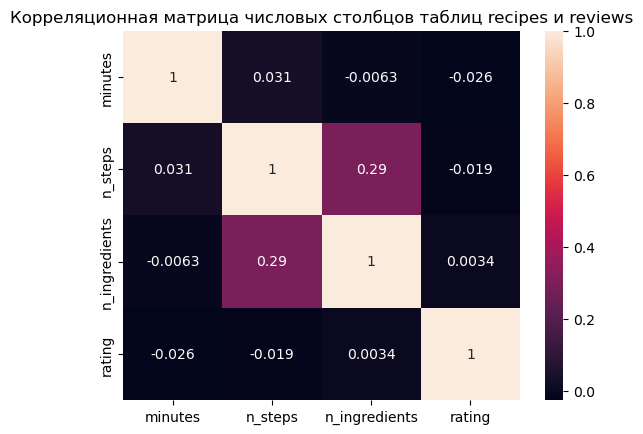

In [477]:
sns.set_palette('YlOrRd')
sns.heatmap(corr, annot= True).set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')